In [1]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
%pylab inline
import matplotlib.pyplot as plt
from librosa import display


Populating the interactive namespace from numpy and matplotlib


In [2]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result  

In [3]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [4]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\adi39\\Desktop\\speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [5]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [6]:
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [7]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [8]:
model=MLPClassifier(alpha=0.01, batch_size=256,random_state=38,epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [9]:
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=38, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [10]:
y_pred=model.predict(x_test)


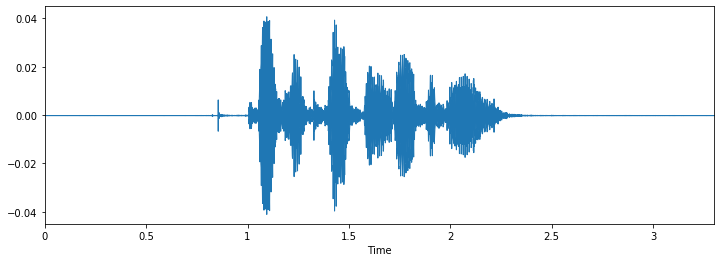

In [11]:
plt.figure(figsize=(12, 4))
data, sampling_rate = librosa.load(r'C:\Users\adi39\Desktop\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-01-01-01.wav')
    
librosa.display.waveplot(data, sr=sampling_rate)

In [12]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 79.17%


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        calm       0.92      0.86      0.89        57
     disgust       0.69      0.85      0.77        48
     fearful       0.76      0.76      0.76        37
       happy       0.79      0.68      0.73        50

    accuracy                           0.79       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.80      0.79      0.79       192



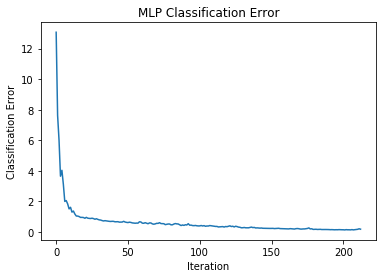

In [14]:
loss_values = model.loss_curve_
plt.plot(loss_values,label="Loss")
plt.title("MLP Classification Error")
plt.xlabel("Iteration")
plt.ylabel("Classification Error")
plt.show()


In [15]:
model.predict(x_test[2:3])

array(['happy'], dtype='<U7')